<a href="https://colab.research.google.com/github/swarubm/ML-ALGORITHMS/blob/main/AdaBoost_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

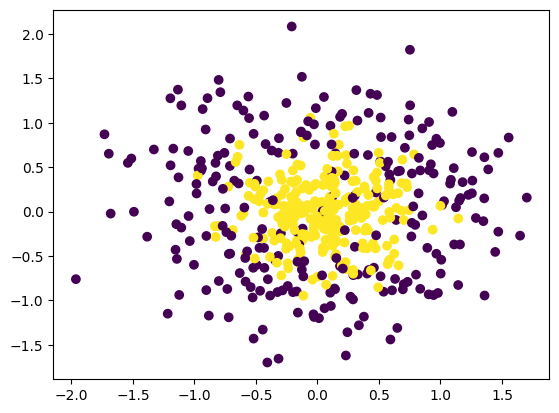

In [12]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

model = AdaBoostClassifier()
accuracy = np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10))
print(f"Cross-Validation Accuracy: {accuracy}")

model.fit(X, y)

Cross-Validation Accuracy: 0.812


AdaBoostClassifier()

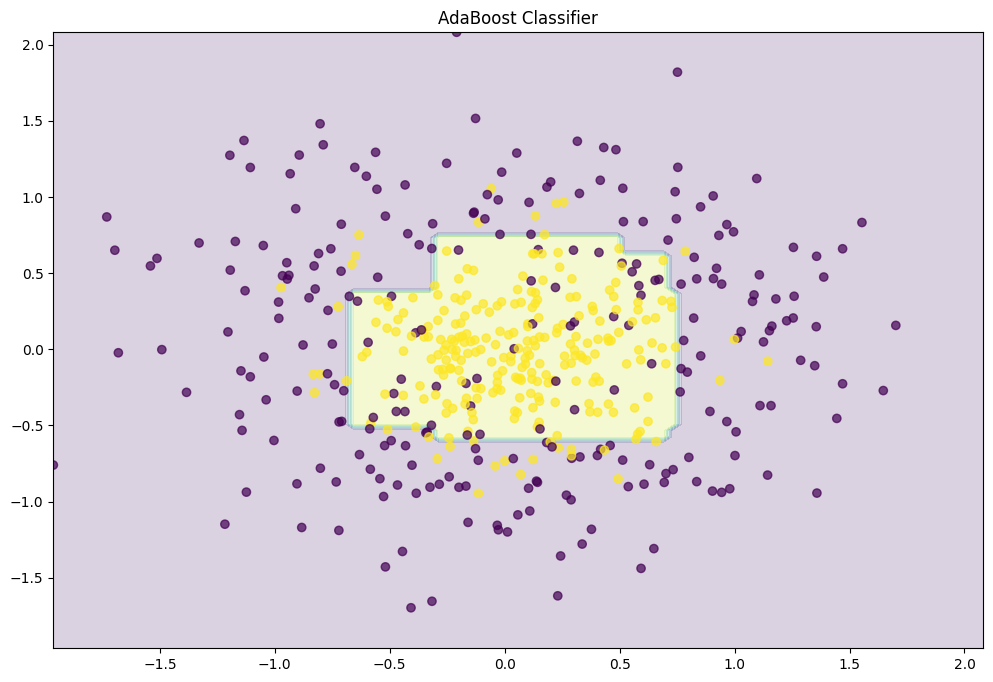

In [14]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("AdaBoost Classifier")
    plt.show()
plot_decision_boundary(model)

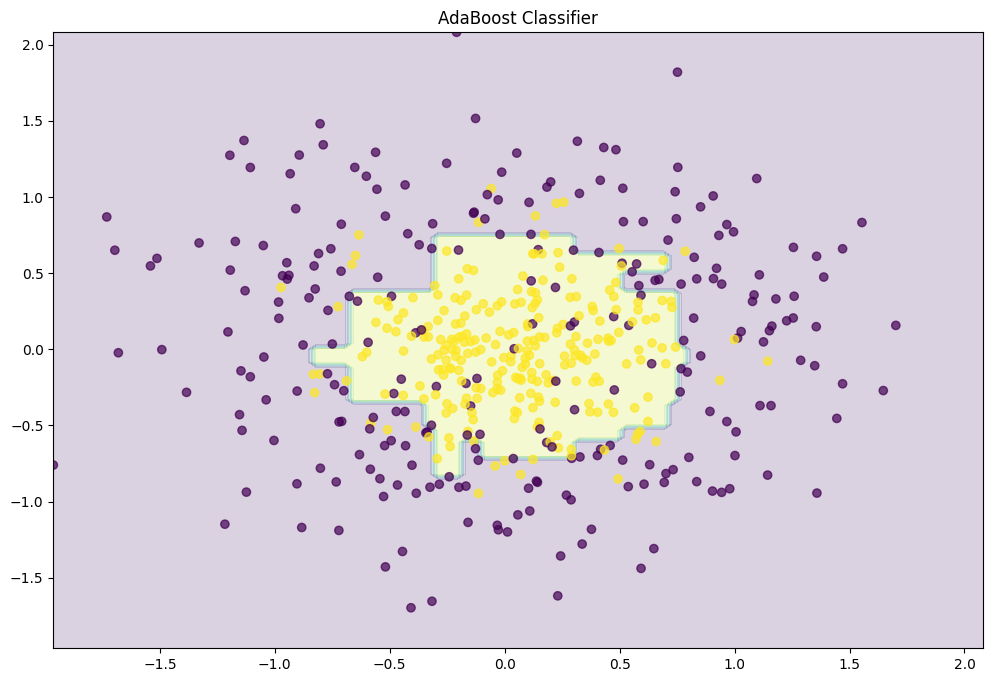

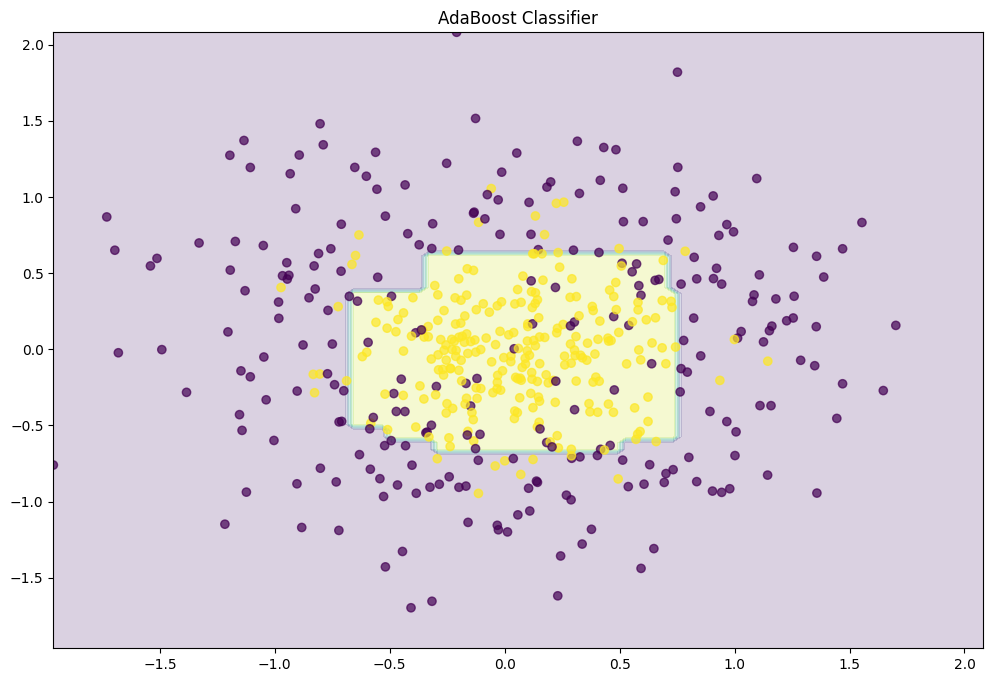

In [15]:
model_1 = AdaBoostClassifier(n_estimators=1500)
model_1.fit(X, y)
plot_decision_boundary(model_1)
model_2 = AdaBoostClassifier(n_estimators=1500, learning_rate=0.1)
model_2.fit(X, y)
plot_decision_boundary(model_2)

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
grid = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=grid,
    n_jobs=-1,
    cv=10,
    scoring='accuracy'
)
grid_result = grid_search.fit(X, y)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8320000000000001 using {'learning_rate': 0.1, 'n_estimators': 500}
